**GRUPO <7>**

Pilar Arias, Álvaro García Cid, Yedra Martín, Amaya Sarasa

In [58]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [59]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [60]:
print(train_images.shape)

(60000, 28, 28)


In [61]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))

[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 215 219 216 238 160   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 185 231 218 221 215 218 214 238 170   

In [62]:
train_labels[0]


9

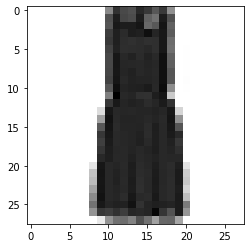

In [63]:
import matplotlib.pyplot as plt
digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [64]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[2]))

60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.09 0.46 0.09 0.   0.   0.   0.   0.   0.19 0.35 0.02 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.39 0.83 0.8  0.73 0.7  0.68 0.73 0.76 0.87 0.56 0.33 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33 0.3  0.78 0.88 0.97 1.   0.93 0.89 0.62 0.27 0.31 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.36 0.27 0.36 0.79 0.85 0.88 0.82 0.62 0.24 0.36 0.28 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.31 0.35 0.24 0.23 0.34 0.42 0.29 0.22 0.3  0.38 0.29 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.29 0.35 0.31 0.31 0.26 0.25 0.29 0.33 0.31 0.38 0.28 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.3  0.35 0.3  0.31 0.33 0.33 0.33 0.33 0.32 0.37 0.3  0.   0.   0.   0.   0.   0.   0.   0.
 

In [65]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


CASO 1

In [67]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


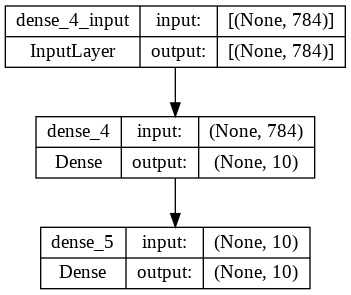

In [68]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

In [69]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [70]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.5415 - accuracy: 0.5015
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8633 - accuracy: 0.7180
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7202 - accuracy: 0.7553
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6542 - accuracy: 0.7770
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6133 - accuracy: 0.7915


CASO 2

In [76]:
from keras import models
from keras import layers
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


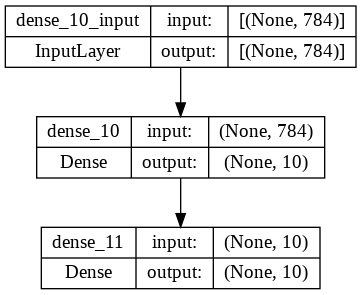

In [77]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [78]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [79]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network2.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8189 - accuracy: 0.7213
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5180 - accuracy: 0.8218
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4693 - accuracy: 0.8378
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4454 - accuracy: 0.8453
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4313 - accuracy: 0.8497


CASO 3

In [80]:
from keras import models
from keras import layers
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


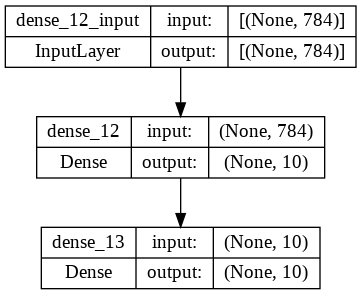

In [81]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [82]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [83]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network3.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.0856 - accuracy: 0.3056
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7692 - accuracy: 0.5328
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 1.5830 - accuracy: 0.5608
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4461 - accuracy: 0.5834
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 1.3388 - accuracy: 0.6047


CASO 4

In [84]:
from keras import models
from keras import layers
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                7850      
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


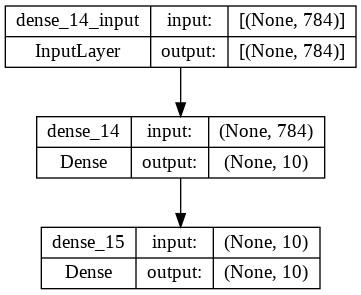

In [85]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [86]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [87]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network4.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.3320 - accuracy: 0.6514
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8074 - accuracy: 0.7598
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6270 - accuracy: 0.7964
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5441 - accuracy: 0.8220
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5000 - accuracy: 0.8331


CASO 5

In [88]:
from keras import models
from keras import layers
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


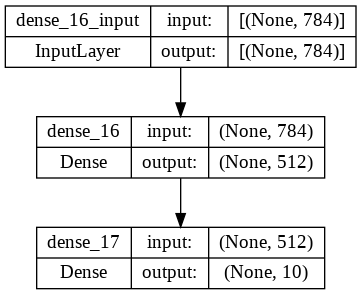

In [89]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [90]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [91]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network5.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.0351 - accuracy: 0.6810
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.6671 - accuracy: 0.7869
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5881 - accuracy: 0.8099
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5453 - accuracy: 0.8213
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5179 - accuracy: 0.8277


CASO 6

In [92]:
from keras import models
from keras import layers
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


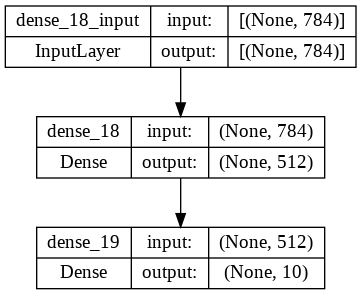

In [93]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [94]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [95]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network6.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.5558 - accuracy: 0.8026
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3833 - accuracy: 0.8595
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3371 - accuracy: 0.8764
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3108 - accuracy: 0.8855
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2925 - accuracy: 0.8914


CASO 7

In [96]:
from keras import models
from keras import layers
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


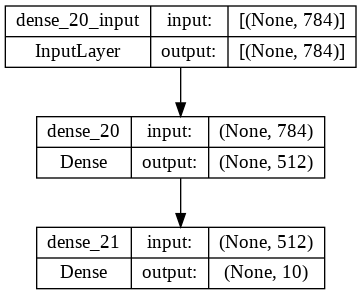

In [97]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [98]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [99]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network7.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.7185 - accuracy: 0.5637
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1.1419 - accuracy: 0.7053
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.9333 - accuracy: 0.7282
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.8289 - accuracy: 0.7416
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.7661 - accuracy: 0.7507


CASO 8

In [101]:
from keras import models
from keras import layers
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


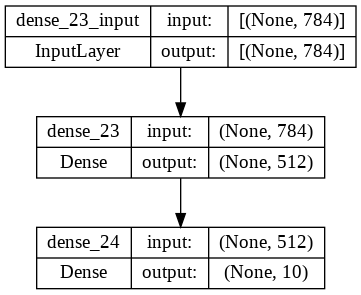

In [102]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [103]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [104]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network8.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.5947 - accuracy: 0.7905
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.4268 - accuracy: 0.8459
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.3858 - accuracy: 0.8577
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3586 - accuracy: 0.8691
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3386 - accuracy: 0.8766
